# Examine the correlation between consistency and importance pattern similarity

In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import math
import scipy
import random
from tqdm import tqdm

#from experiments.causal_trace import plot_trace_heatmap, plot_trace_heatmap_from_values, plot_normalized_trace_heatmap_from_values

In [2]:
query_file = "/cephyr/users/lovhag/Alvis/projects/rome/data/known_1000.json"
results_folder = "/cephyr/users/lovhag/Alvis/projects/rome/data/results/gpt2-xl/known_1000/causal_trace_1907775"

In [3]:
with open(query_file) as f:
    tmp = json.load(f)
    
queries = pd.DataFrame(tmp)
queries

,known_id,subject,attribute,template,prediction,prompt,relation_id
0,0,Vinson Massif,Antarctica,{} is located in the continent,of Antarctica. It is the largest of the three,Vinson Massif is located in the continent of,P30
1,1,Beats Music,Apple,{} is owned by,"Apple, which is also the owner of Beats Elect...",Beats Music is owned by,P127
2,2,Audible.com,Amazon,{} is owned by,"Amazon.com, Inc. or its affiliates.",Audible.com is owned by,P127
3,3,The Big Bang Theory,CBS,{} premieres on,CBS on September 22.<|endoftext|>,The Big Bang Theory premieres on,P449
4,4,MacApp,Apple,"{}, a product created by",Apple to help developers create apps for the ...,"MacApp, a product created by",P178
...,...,...,...,...,...,...,...
1204,1204,Kyle Farnsworth,pitcher,{} plays in the position of,"the pitcher, and he's a very good one",Kyle Farnsworth plays in the position of the,P413
1205,1205,Gregory XVI,pope,"{}, whose position is that of","a ""superior"" pope, has been the","Gregory XVI, whose position is that of a ""supe...",P39
1206,1206,My Sister Sam,CBS,{} was originally aired on,CBS in the United States. It was a remake,My Sister Sam was originally aired on,P449
1207,1207,Devonshire Arms,London,{} is located in,"the heart of the city of London, just a",Devonshire Arms is located in the heart of the...,P276


In [4]:
data = pd.DataFrame()

for ix in queries.index:
    tmp = np.load(os.path.join(results_folder, f"cases/knowledge_{ix}_mlp.npz"), allow_pickle=True)
    if tmp["correct_prediction"]:
        data = data.append({"low_score": tmp["low_score"],
                            "high_score": tmp["high_score"],
                            "correct_prediction": True
                           }, 
                           ignore_index=True)
    else:
        data = data.append({"low_score": None,
                            "high_score": None,
                            "correct_prediction": False
                           }, 
                           ignore_index=True
                          )
data

,correct_prediction,high_score,low_score
0,1.0,0.0947334,0.018144913017749786
1,1.0,0.6830733,0.0045065260492265224
2,1.0,0.25511006,0.002064700238406658
3,1.0,0.3880098,0.013669691048562527
4,1.0,0.12757152,0.009430327452719212
...,...,...,...
1204,1.0,0.047830176,0.0041994089260697365
1205,1.0,0.37985092,0.0049367728643119335
1206,1.0,0.11593495,0.015754466876387596
1207,1.0,0.055568155,0.014930786564946175


In [5]:
data.correct_prediction.value_counts()

1.0    1208
0.0       1
Name: correct_prediction, dtype: int64

In [6]:
data = data.dropna()
data = data.astype("float")
data

,correct_prediction,high_score,low_score
0,1.0,0.094733,0.018145
1,1.0,0.683073,0.004507
2,1.0,0.255110,0.002065
3,1.0,0.388010,0.013670
4,1.0,0.127572,0.009430
...,...,...,...
1204,1.0,0.047830,0.004199
1205,1.0,0.379851,0.004937
1206,1.0,0.115935,0.015754
1207,1.0,0.055568,0.014931


In [7]:
data["te"] = data["high_score"]-data["low_score"]
data.te.mean()

0.228743059924314

In [8]:
data.te.median()

0.16008361619606148

In [9]:
data.te.max()

0.9913934274809435

In [10]:
queries.loc[data.te.argmax()]

known_id                                            809
subject                                  Lee Chang-dong
attribute                                        Korean
template                   The native language of {} is
prediction              Korean.\n\nContents show]\n\nBi
prompt         The native language of Lee Chang-dong is
relation_id                                        P103
Name: 809, dtype: object

In [11]:
data.te.min()

-0.16905477643013

In [12]:
queries.loc[data.te.argmin()]

known_id                                                    333
subject                                           Uqba ibn Nafi
attribute                                                 Islam
template                     {} is affiliated with the religion
prediction                   of Islam.\n\nThe Prophet (peace be
prompt         Uqba ibn Nafi is affiliated with the religion of
relation_id                                                P140
Name: 333, dtype: object

In [13]:
queries.loc[data[data.te<0].index]

,known_id,subject,attribute,template,prediction,prompt,relation_id
9,9,De finibus bonorum et malorum,Latin,The original language of {} is,"the same as the Latin of the Roman law,",The original language of De finibus bonorum et...,P364
114,114,Antonio Sartorio,opera,{} is known for performing,"in the world's most prestigious opera houses,...",Antonio Sartorio is known for performing in th...,P136
130,130,Hamza ibn Abdul-Muttalib,Islam,{} is affiliated with the religion,of Islam. He is a Muslim scholar and a,Hamza ibn Abdul-Muttalib is affiliated with th...,P140
144,144,Camp Academia,Antarctica,{} is located in the continent,"of Antarctica, and is the only school in the",Camp Academia is located in the continent of,P30
215,215,Adi ibn Hatim,Islam,{} is affiliated with the religion,of Islam. He is a scholar of the Qur,Adi ibn Hatim is affiliated with the religion of,P140
221,221,Schreckhorn,Europe,{} belongs to the continent of,"Europe, and is the largest of the three species",Schreckhorn belongs to the continent of,P30
251,251,Vegard Skogheim,midfielder,{} plays in the position of,"a defensive midfielder, but he is also a striker",Vegard Skogheim plays in the position of a def...,P413
333,333,Uqba ibn Nafi,Islam,{} is affiliated with the religion,of Islam.\n\nThe Prophet (peace be,Uqba ibn Nafi is affiliated with the religion of,P140
355,355,David Hilbert,geometry,{}'s expertise is,"in the theory of algebraic geometry, and he",David Hilbert's expertise is in the theory of ...,P101
435,435,Voodoo Lounge,English,The original language of {} is,a blend of English and French. The French ver...,The original language of Voodoo Lounge is a bl...,P364


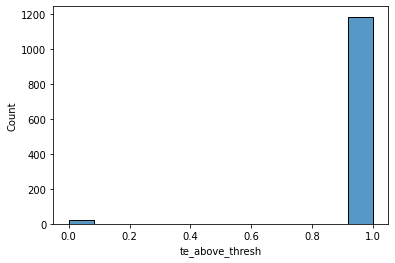

In [14]:
te_thresh = 0
data["te_above_thresh"] = (data.te>te_thresh)
ax = sns.histplot(data=data, x="te_above_thresh")
plt.show()

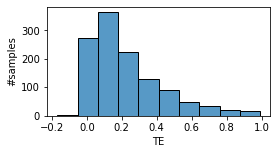

In [16]:
plt.figure(figsize=(4,2))
sns.histplot(data=data, x="te", bins=10, stat="count")
plt.xlabel("TE")
plt.ylabel("#samples")
plt.savefig("/cephyr/users/lovhag/Alvis/projects/rome/images/knowns_te.svg", bbox_inches="tight")
plt.show()